In [8]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install scikit-learn


     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 401.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 1.9 MB/s eta 0:00:06
   ---------------------------------------- 0.1/10.6 MB 1.8 MB/s eta 0:00:06
    --------------------------------------- 0.2/10.6 MB 1.4 MB/s eta 0:00:08
    --------------------------------------- 0.2/10.6 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.3/10.6 MB 1.5 MB/s eta 0:00:07
   - -------------------------------------- 0.4/10.6 MB 1.5 MB/s eta 0:00:07
   - -------------------------------------- 0.5/10.6 MB 1.6 MB/s eta 0:00:07
   -- -------

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Load the dataset
df = pd.read_csv('dataset.csv')


In [11]:
#missing values
missing_values = df.isnull().sum()
print(missing_values)


Date                 0
Punjab               0
Haryana              0
Rajasthan            0
Delhi                0
UP                   0
Uttarakhand          0
HP                   0
J&K                  0
Chandigarh           0
Chhattisgarh         0
Gujarat              0
MP                   0
Maharashtra          0
Goa                  0
DNH                  0
Andhra Pradesh       0
Telangana            0
Karnataka            0
Kerala               0
Tamil Nadu           0
Pondy                0
Bihar                0
Jharkhand            0
Odisha               0
West Bengal          0
Sikkim               0
Arunachal Pradesh    0
Assam                0
Manipur              0
Meghalaya            0
Mizoram              0
Nagaland             0
Tripura              0
dtype: int64


In [12]:
# Convert Date column to datetime 
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y %H:%M')

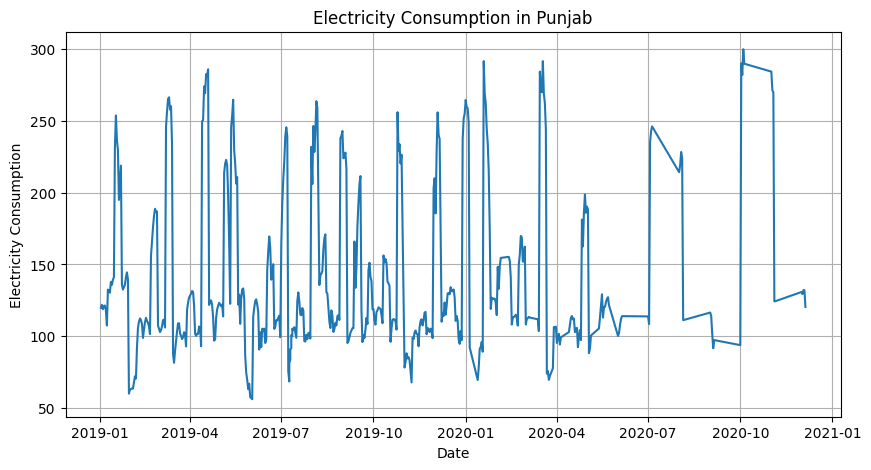

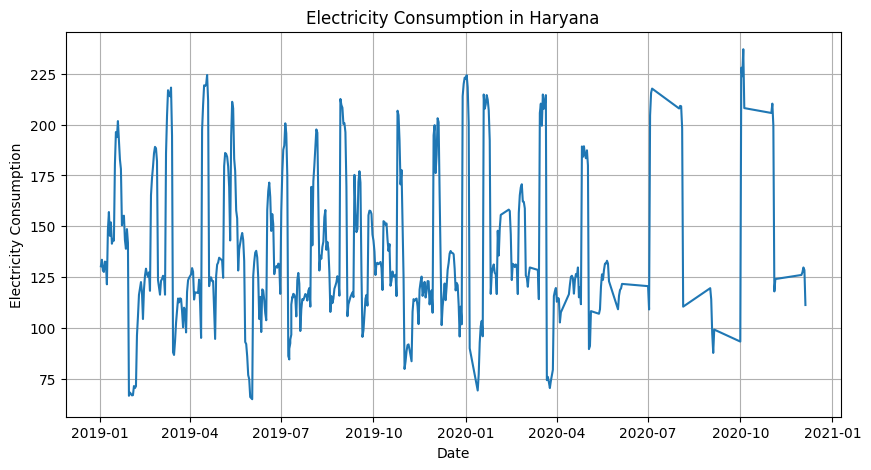

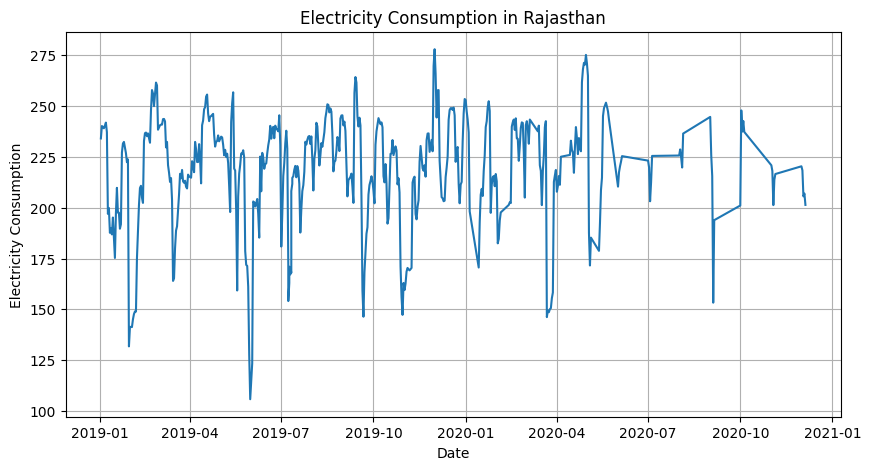

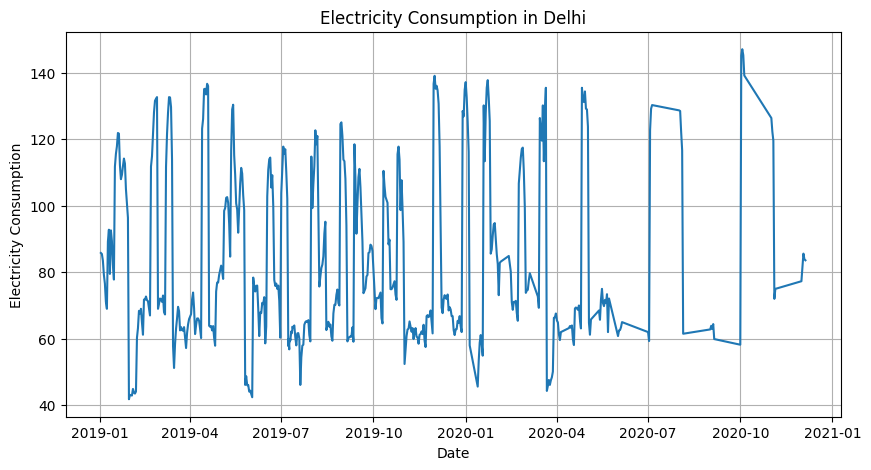

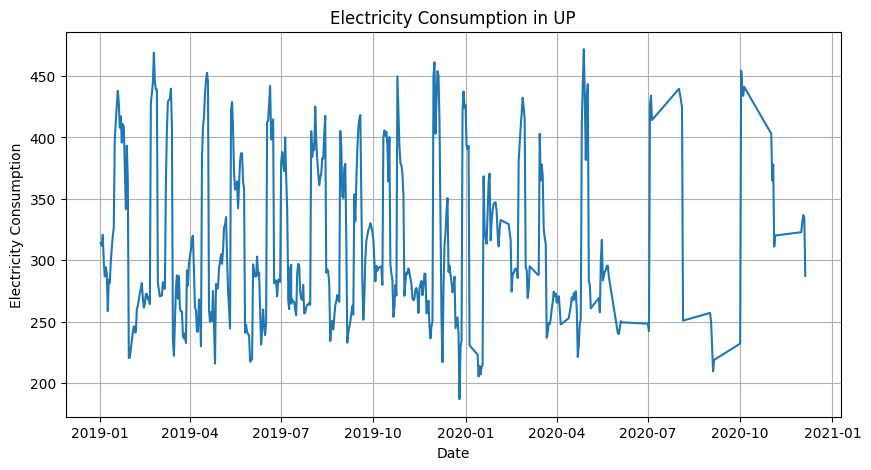

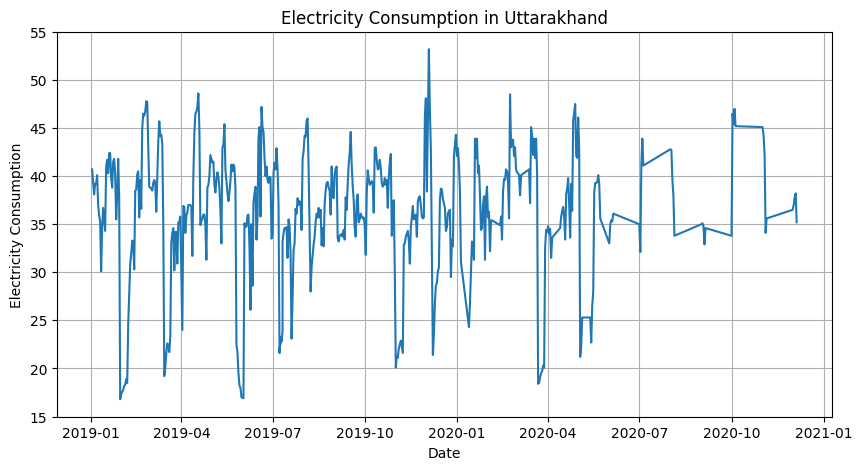

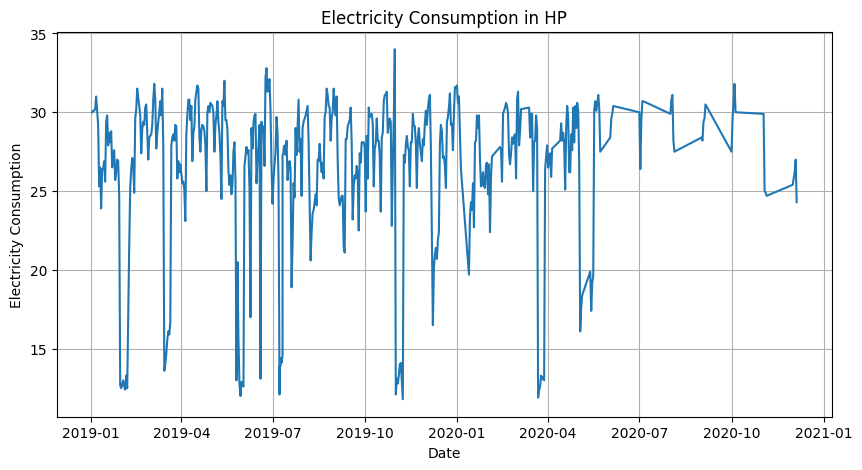

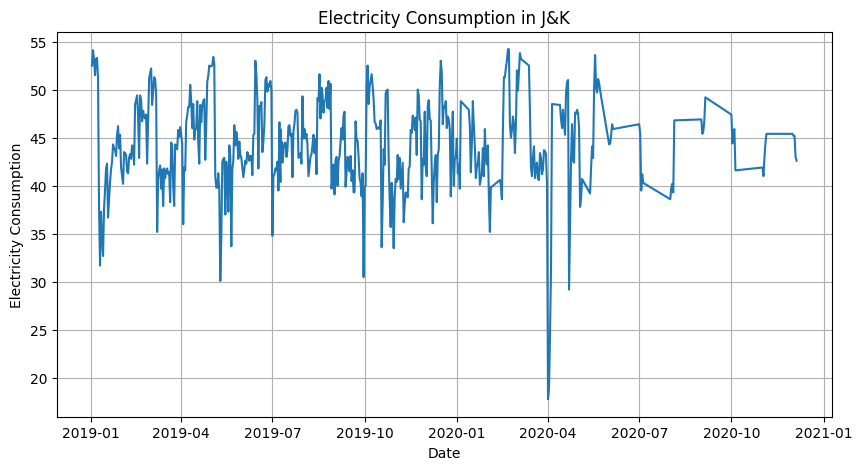

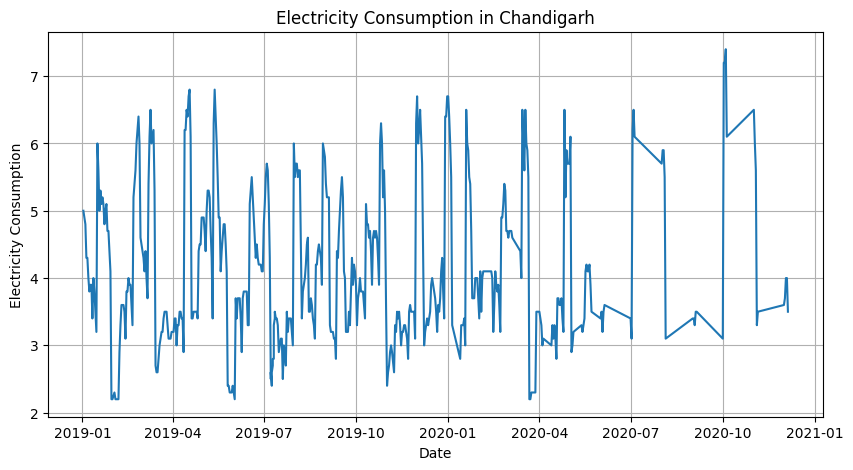

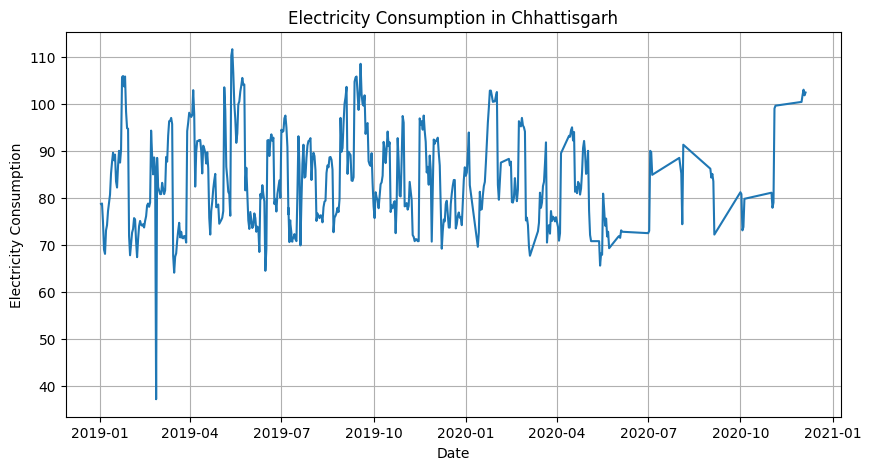

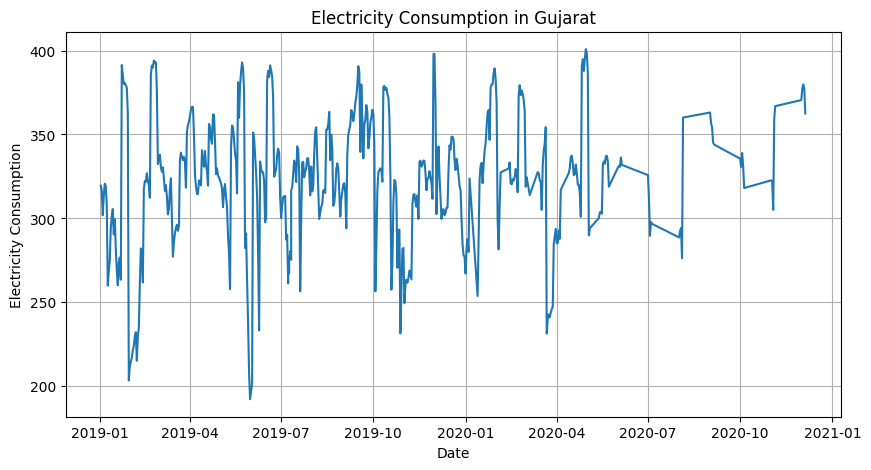

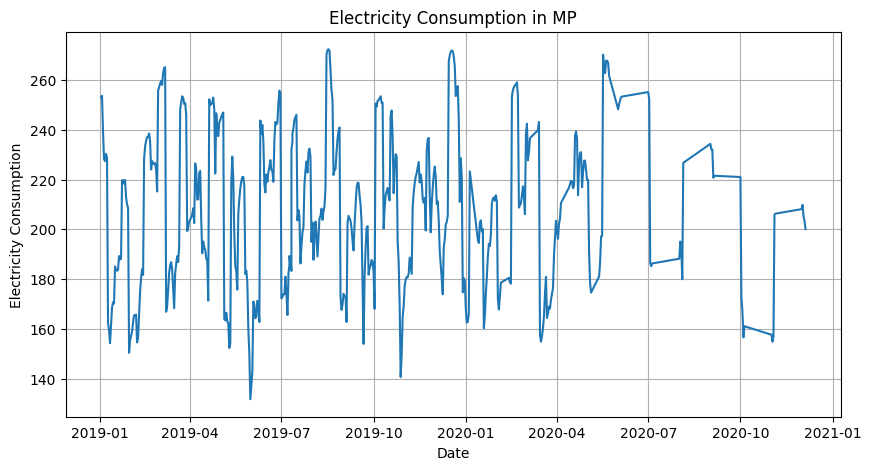

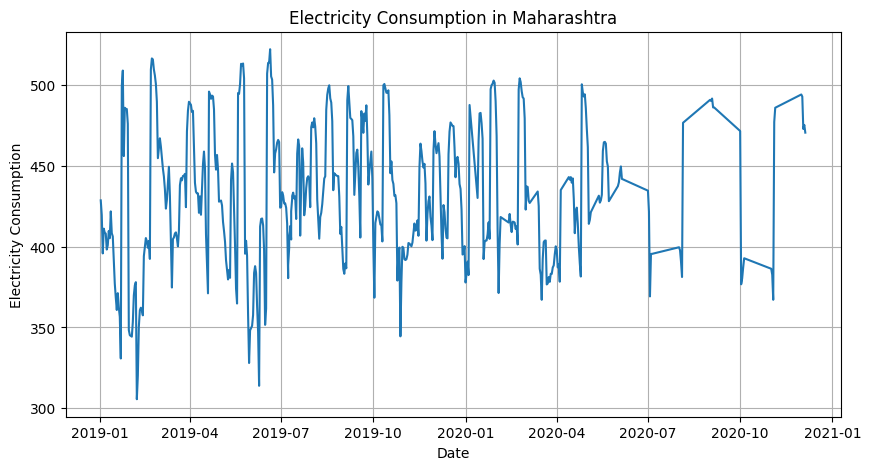

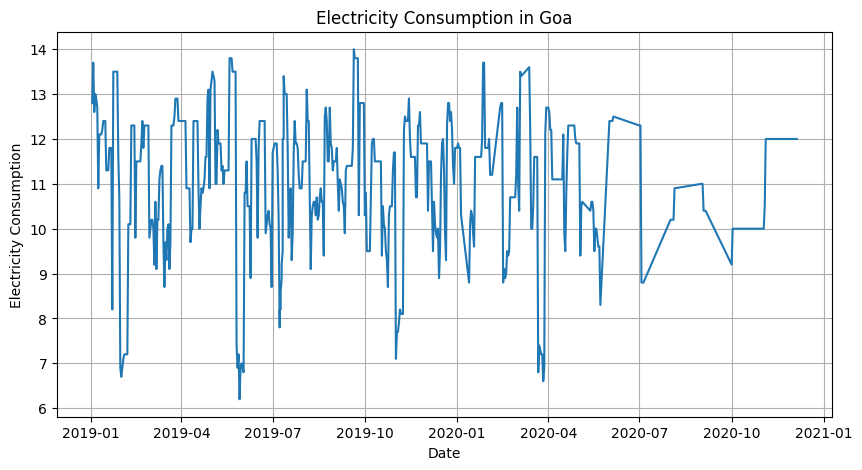

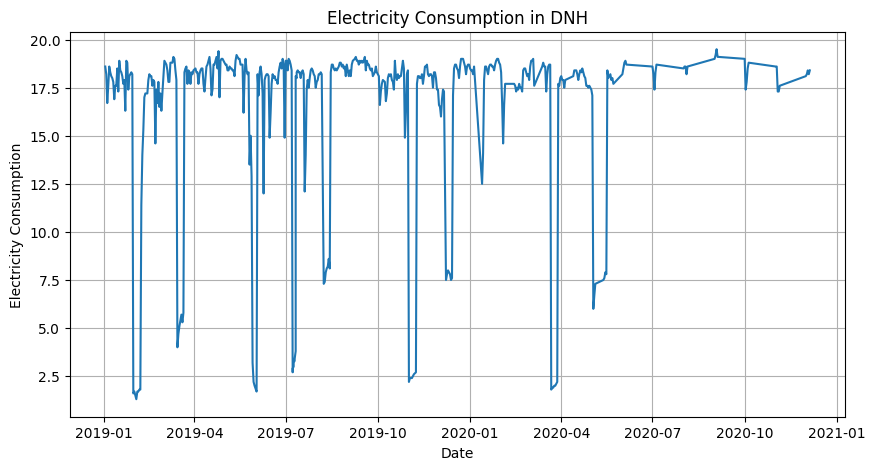

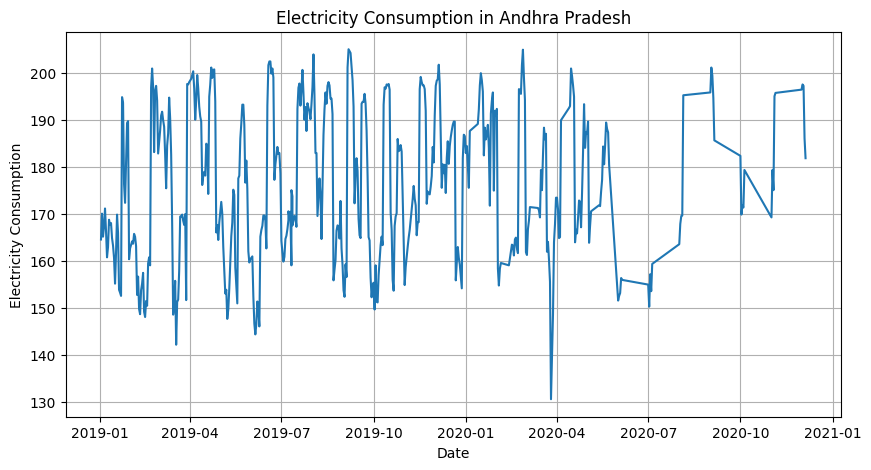

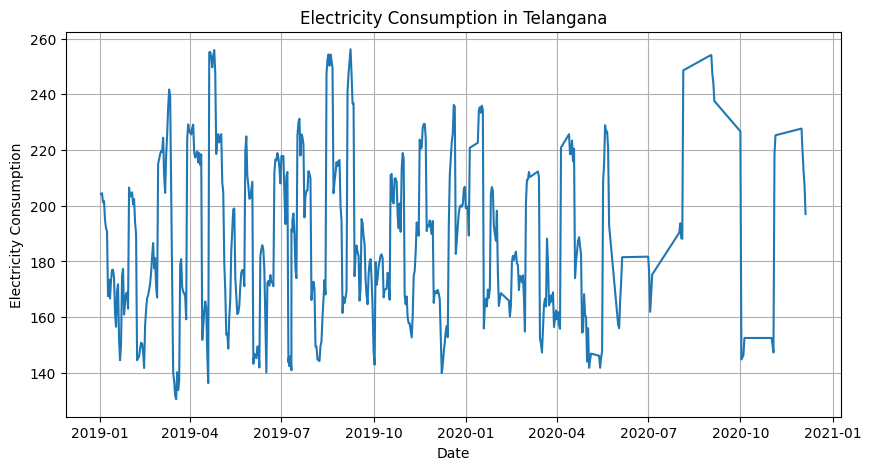

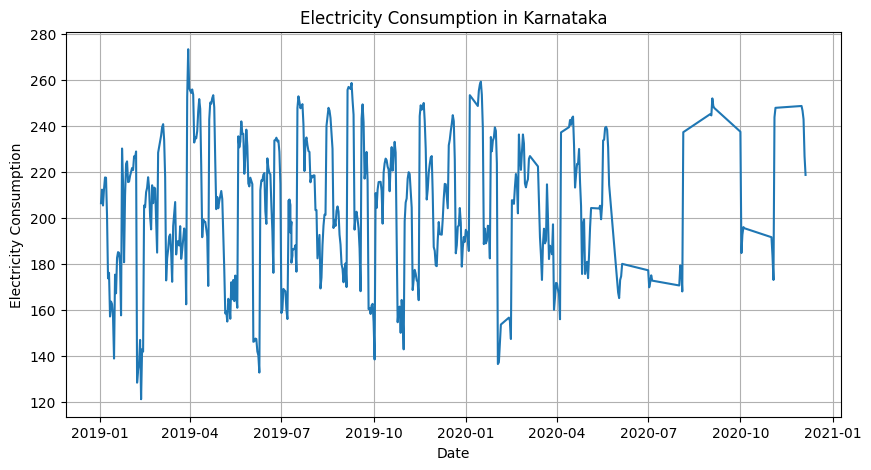

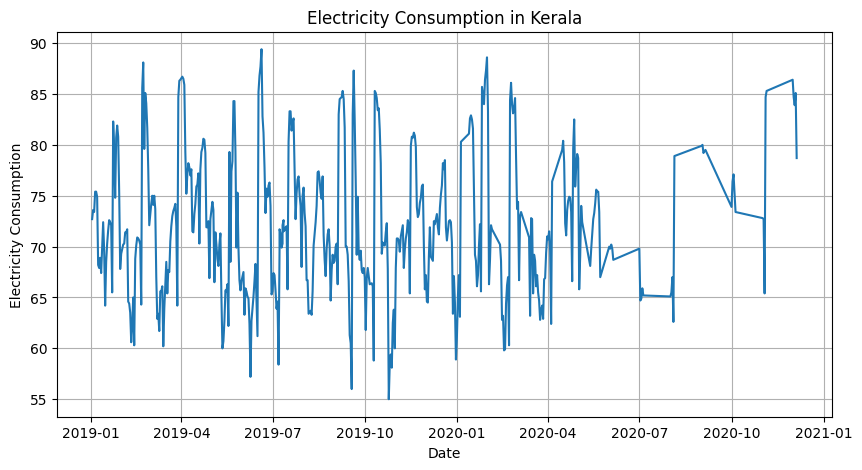

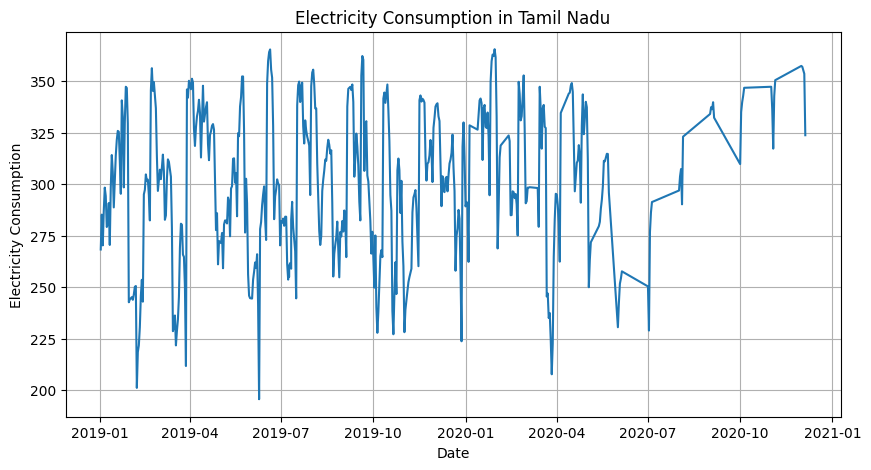

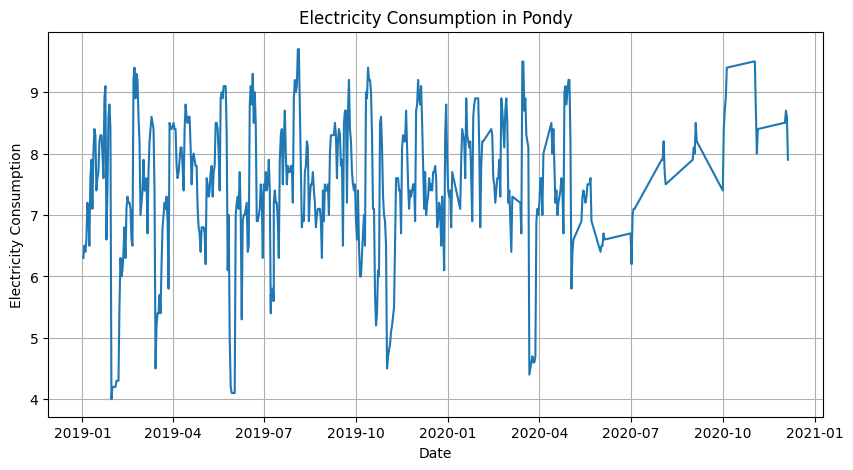

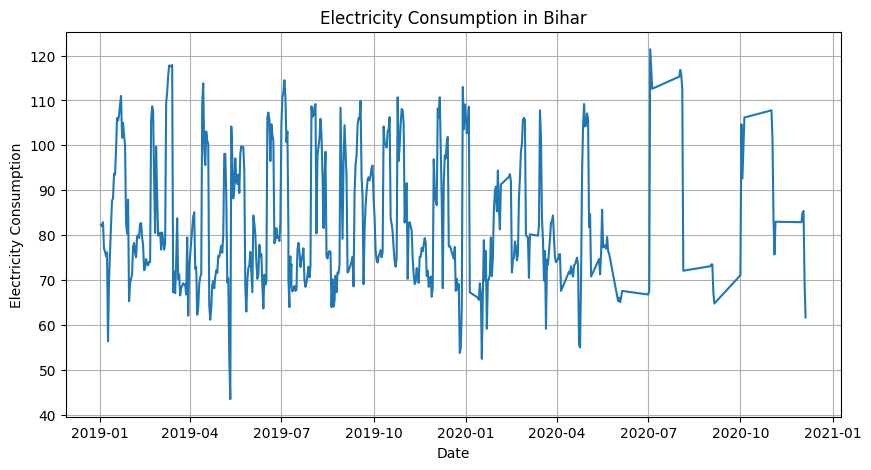

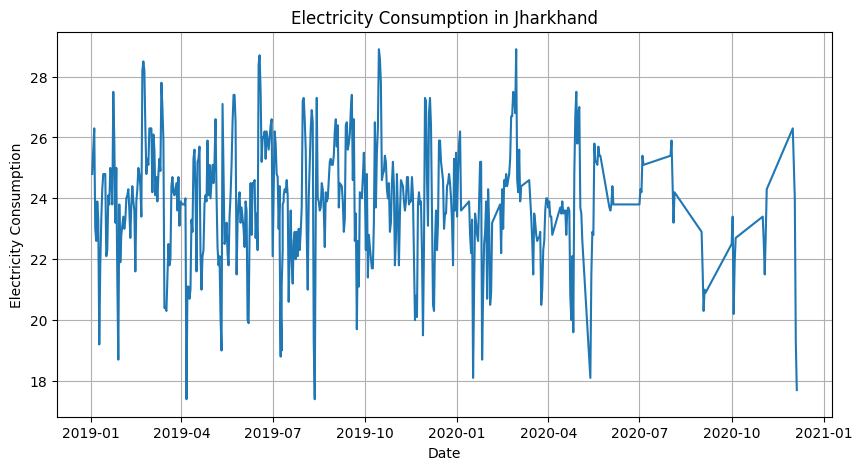

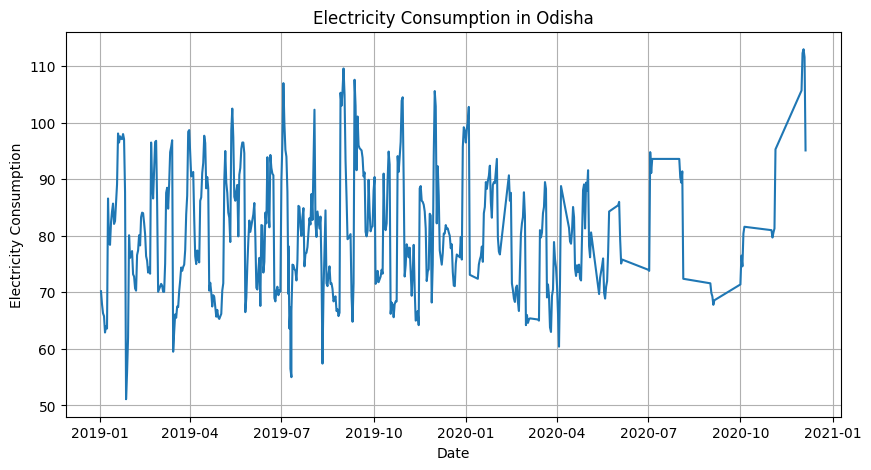

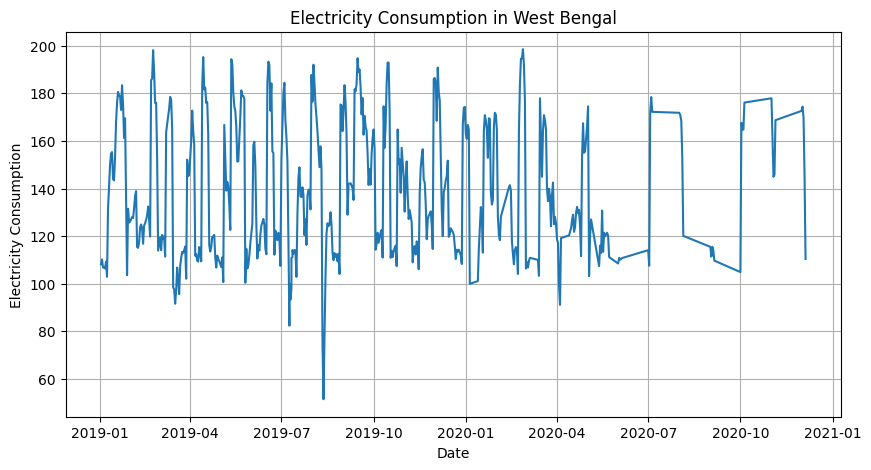

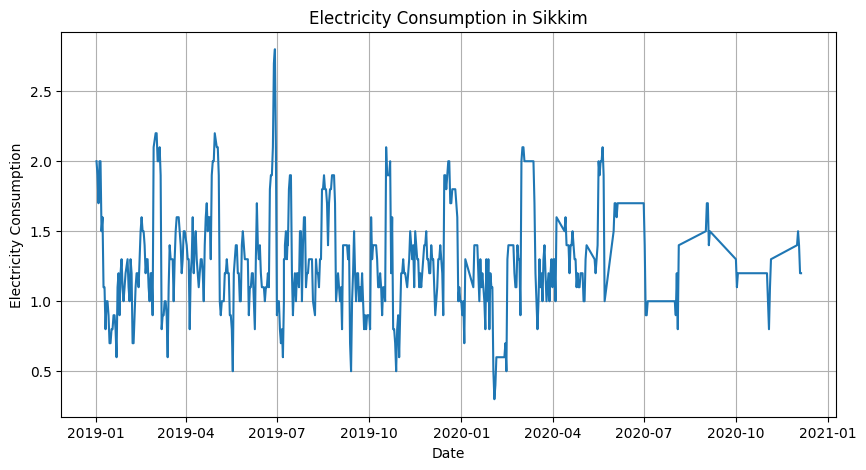

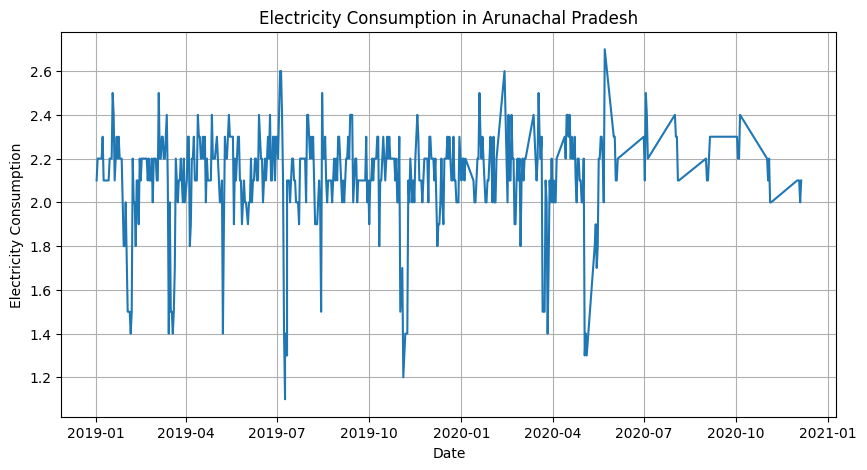

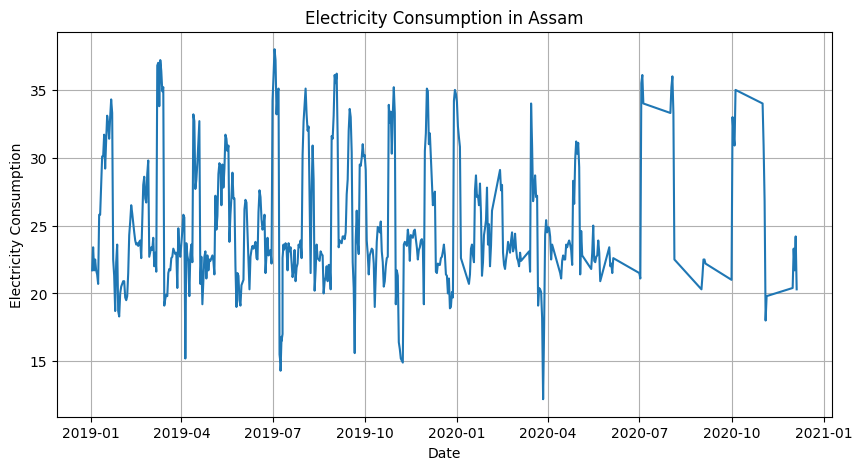

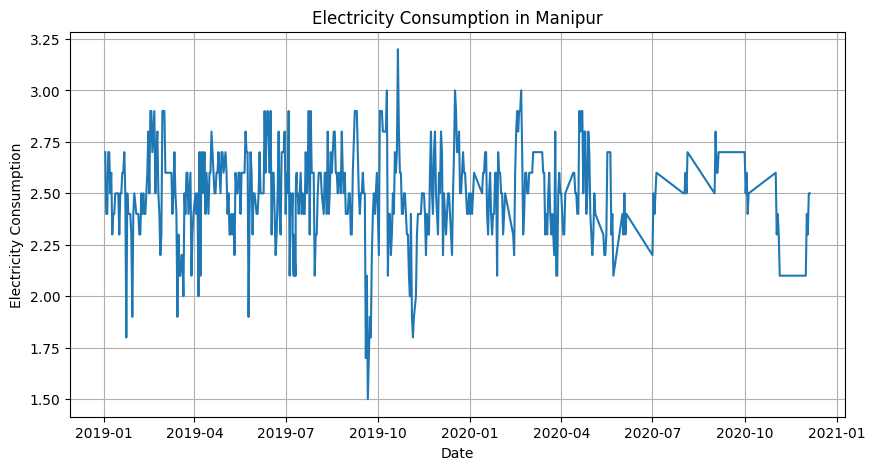

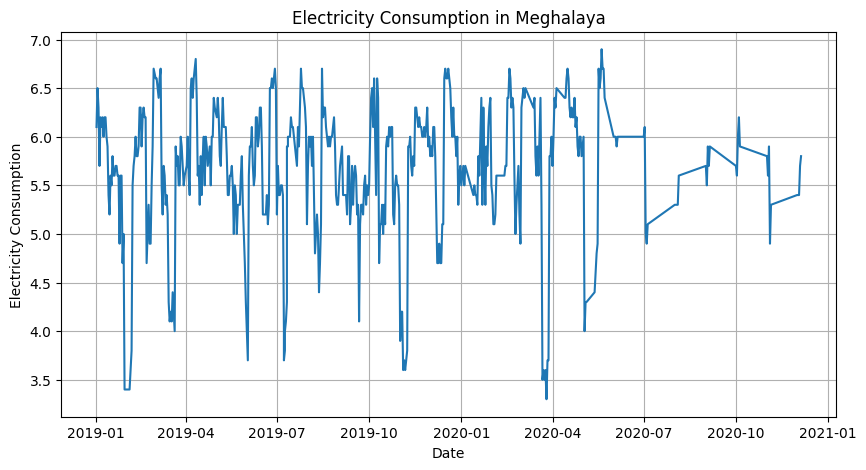

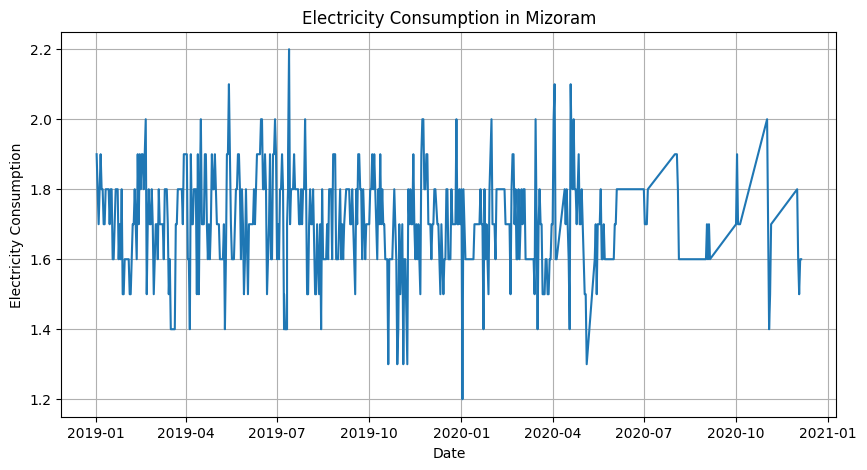

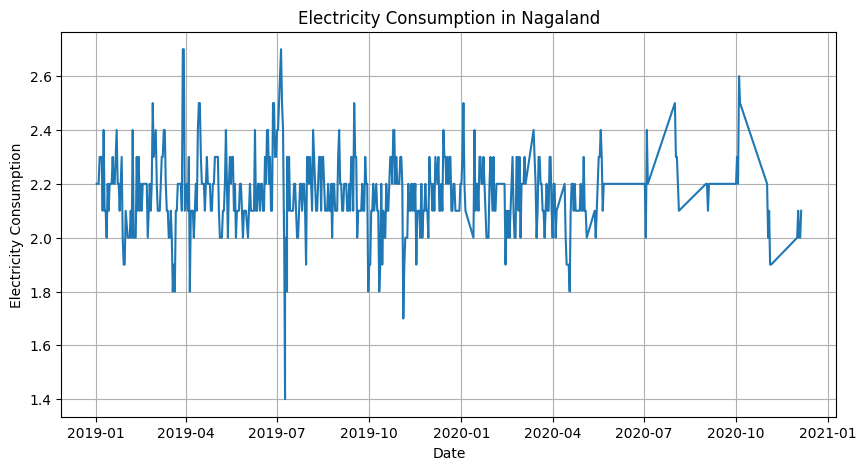

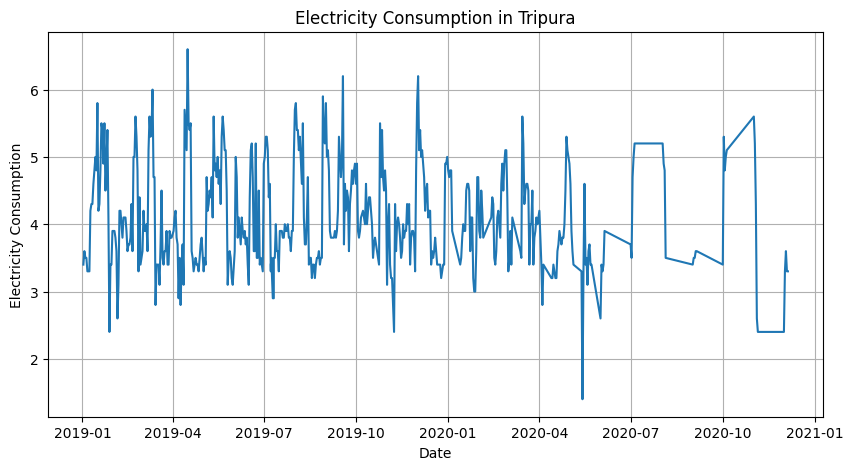

In [13]:
for column in df.columns[1:]:
    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df[column])
    plt.title(f'Electricity Consumption in {column}')
    plt.xlabel('Date')
    plt.ylabel('Electricity Consumption')
    plt.grid(True)
    plt.show()


In [14]:
# Extract date
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.dayofweek


In [15]:
X = df[['Month', 'Day', 'Day_of_Week']]
y = df['Kerala'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Initialize the model
model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [17]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Mean Squared Error: 42.41756845368355
R-squared Score: -0.0613353795895244


In [19]:
#prediction for a future date
future_date = pd.DataFrame({'Month': [7], 'Day': [17], 'Day_of_Week': [2]})  # Provide future data
future_prediction = model.predict(future_date)

print(f'Predicted Electricity Consumption: {future_prediction}')


Predicted Electricity Consumption: [72.60074057]


In [21]:
! pip install joblib
import joblib

joblib.dump(model, 'model')


['model']